# Исследование объявлений о продаже квартир

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt #
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# чтение файла с данными, разделение по колонкам и сохранение в df
pd.set_option('display.max_columns',None) # отображаем все столбцы
df.head(15) # получение первых 15 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.columns  # перечень названий столбцов таблицы df

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Встречается множество пропущенных значений в столбцах.
Столбец cityCenters_nearest записан  не в «змеином_регистре». В названиях населенных пунктов встречается Ё и Е. В некорректном формате указаны данные неокторых столбцов-исходные данные относились к вещественному типу,необходимо заменить на целое число.
Дата публикации объявления указана с временнем, Но время не заполнено.

## Предобработка данных

In [4]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименование столбца
df.columns #проверим выполнение действия

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Столбец cityCenters_nearest был приведен к единому регистру

In [5]:
df.isna().sum() # найдем строки с пропусками


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()) #заполним пропуски в столбце высота потолков средним значением
df['balcony'] = df['balcony'].fillna('0')  # заменим пропущенные значения на '0'
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False #заменим пропущенные значения в столбце апартаменты
df['living_area'] = df['living_area'].fillna(df.groupby(['total_area','rooms'])['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['total_area','rooms'])['kitchen_area'].transform('median')) #заполняем пропуски жилой площади медианным значением
df.isna().sum() #проверим выполнение действий

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area               212
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              421
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

Заполнила пропуски в столбце Высота потолков медианным значением. Заменила пропущенные значения в столбце апартаменты
В столбце Балоконы - заменила просуски нулевым значением.

In [7]:
df['locality_name'].unique() #Просмотр уникальных названий населённого пункта

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') #заменим Ё на Е в названиях населенных пунктов
df['locality_name'].unique() #проверим действие


array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

**Вывод**

В столбце с названиями населенных пунктов заменила Ё на Е

In [9]:
df['ceiling_height'].unique() # посмотрим на значения столбца

array([  2.7      ,   2.7714989,   3.03     ,   2.5      ,   2.67     ,
         2.56     ,   3.05     ,   2.75     ,   2.6      ,   2.9      ,
         2.8      ,   2.55     ,   3.       ,   2.65     ,   3.2      ,
         2.61     ,   3.25     ,   3.45     ,   2.77     ,   2.85     ,
         2.64     ,   2.57     ,   4.15     ,   3.5      ,   3.3      ,
         2.71     ,   4.       ,   2.47     ,   2.73     ,   2.84     ,
         3.1      ,   2.34     ,   3.4      ,   3.06     ,   2.72     ,
         2.54     ,   2.51     ,   2.78     ,   2.76     ,  25.       ,
         2.58     ,   3.7      ,   2.52     ,   5.2      ,   2.87     ,
         2.66     ,   2.59     ,   2.       ,   2.45     ,   3.6      ,
         2.92     ,   3.11     ,   3.13     ,   3.8      ,   3.15     ,
         3.55     ,   3.16     ,   3.62     ,   3.12     ,   2.53     ,
         2.74     ,   2.96     ,   2.46     ,   5.3      ,   5.       ,
         2.79     ,   2.95     ,   4.06     ,   2.94     ,   3.8

In [10]:
df.loc[(df["ceiling_height"] >= 20) & (df["is_apartment"] == False),"ceiling_height"] /= 10  #заменим значение столбца с высотой потолка
display(df['ceiling_height'].sort_values().unique())

array([  1.       ,   1.2      ,   1.75     ,   2.       ,   2.2      ,
         2.25     ,   2.26     ,   2.3      ,   2.34     ,   2.4      ,
         2.45     ,   2.46     ,   2.47     ,   2.48     ,   2.49     ,
         2.5      ,   2.51     ,   2.52     ,   2.53     ,   2.54     ,
         2.55     ,   2.56     ,   2.57     ,   2.58     ,   2.59     ,
         2.6      ,   2.61     ,   2.62     ,   2.63     ,   2.64     ,
         2.65     ,   2.66     ,   2.67     ,   2.68     ,   2.69     ,
         2.7      ,   2.71     ,   2.72     ,   2.73     ,   2.74     ,
         2.75     ,   2.76     ,   2.77     ,   2.7714989,   2.78     ,
         2.79     ,   2.8      ,   2.81     ,   2.82     ,   2.83     ,
         2.84     ,   2.85     ,   2.86     ,   2.87     ,   2.88     ,
         2.89     ,   2.9      ,   2.91     ,   2.92     ,   2.93     ,
         2.94     ,   2.95     ,   2.96     ,   2.97     ,   2.98     ,
         2.99     ,   3.       ,   3.01     ,   3.02     ,   3.0

**Вывод**

Заменила значения в столбце с высотой потолка

In [11]:
print(df.duplicated().sum()) #поиск явных дубликатов

0


**Вывод**

Явные дубликаты не найдены

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S') #преобразуем формат даты

In [13]:
df['ceiling_height'] = df['ceiling_height'].round().astype('int64') # преобразуем тип данных к нужному, предварительно округлив
df['is_apartment'] = df['is_apartment'].astype('int64') # преобразовали тип данных в целое число
df['first_day_exposition'] = df['first_day_exposition'].astype('int64') # преобразовали тип данных в целое число # преобразуем тип данных к нужному, предварительно округлив
df.info() # проверяем, изменился ли тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  int64  
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  int64  
 6   floors_total          23613 non-null  float64
 7   living_area           23487 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23278 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**

Столбец first_day_exposition отформатирован по дате, далее переведен в тип для целого числа.
Исходные данные ceiling_height,is_apartment относились к вещественному типу, методом astype() перевела в целое число. Данные в столбцах получились более читаемы.

## Расчёты и добавление результатов в таблицу

In [14]:
df['price_per_square_meter'] = (df['last_price']/df['total_area']).round(2) # добавила столбец с цену квадратного метра, предварительно окурглив данные
display(df['price_per_square_meter'].head())

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_square_meter, dtype: float64

**Вывод**

Добавила столбец в таблицу с центой за квадратный метр

In [15]:
df['first_day_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday # добавила в столбец день недели
display(df['first_day_weekday'].head())

0    3
1    1
2    3
3    4
4    1
Name: first_day_weekday, dtype: int64

**Вывод**

Добавила столбец с днем недели, где понедельник =0, а воскресенье=6

In [16]:
df['first_day_month'] = pd.DatetimeIndex(df['first_day_exposition']).month # добавила столбец с месяцем публикации объявления
display(df['first_day_month'].head())

0     3
1    12
2     8
3     7
4     6
Name: first_day_month, dtype: int64

**Вывод**

Добавила столбец с месяцем публикации объявления

In [17]:
df['first_day_year'] = pd.DatetimeIndex(df['first_day_exposition']).year # добавила столбец с годом публикации объявления
display(df['first_day_year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: first_day_year, dtype: int64

**Вывод**

Добавила столбец с годом публикации объявления

In [18]:
def floor_definition(df):  #создаем функцию для определения категорий этажей квартиры
    if df['floor'] == 1:
        return 'первый'
    elif (df['floors_total'] == df['floor']) & (df['floor'] !=1):
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_definition,axis=1)
display(df['floor_category'].head())  # проверим новый столбец с записями значений функции

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

**Вывод**

Добавлен столбец с категориями этажей квартиры - первый, последний, другой.


In [19]:
df['living_total_area'] = (df['living_area']/df['total_area']).round(2) # находим соотношение жилой и общей площади
display(df['living_total_area'].head())

0    0.47
1    0.46
2    0.61
3    0.34
4    0.32
Name: living_total_area, dtype: float64

**Вывод**

Добавлен столбец с соотношением жилой и общей площади

In [20]:
df['kitchen_total_area'] = (df['kitchen_area']/df['total_area']).round(2) # находим соотношение площади кухни к общей площади
display(df['kitchen_total_area'].head())

0    0.23
1    0.27
2    0.15
3    0.09
4    0.41
Name: kitchen_total_area, dtype: float64

**Вывод**

Добавлен столбец с соотношением площади кухни к общей площади

## Исследовательский анализ данных

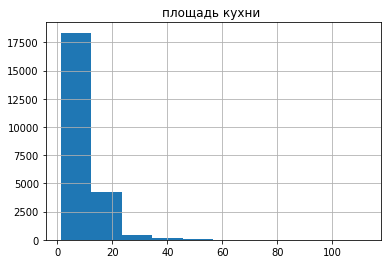

In [21]:
df['kitchen_area'].hist() # построим гистограмму для данных о площади кухни
df['kitchen_area'].describe() # выведем числоое описание данных
plt.title('площадь кухни ')
plt.show()

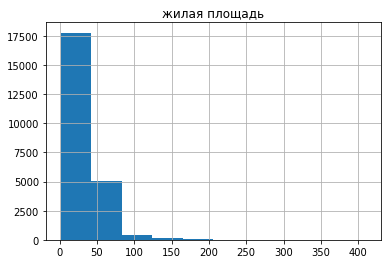

In [22]:
df['living_area'].hist() # построим гистограмму данных жилой площади
df['living_area'].describe() # выведем числоое описание данных
plt.title('жилая площадь')
plt.show()

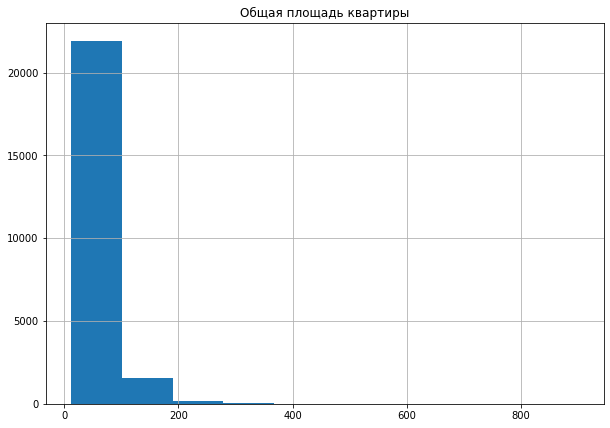

In [23]:
df['total_area'].hist(figsize=(10,7)) # построим гистограмму данных общей площади квартиры
df['total_area'].describe() # выведем числоое описание данных
plt.title('Общая площадь квартиры')
plt.show()

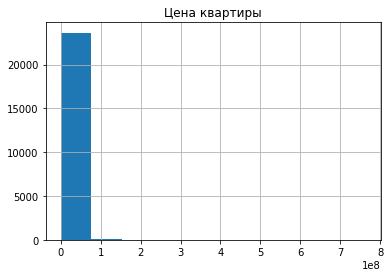

In [24]:
df['last_price'].hist(bins=10) # построим гистограмму данных цены
df['last_price'].describe() # выведем числоое описание данных
plt.title('Цена квартиры')
plt.show()

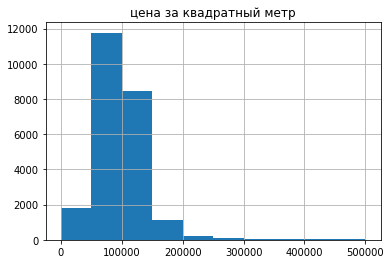

In [25]:
df['price_per_square_meter'].hist(bins=10, range=(0,500000)) # построим гистограмму данных цены за квадратный метр
df['price_per_square_meter'].describe() # выведем числоое описание данных
plt.title('цена за квадратный метр')
plt.show()

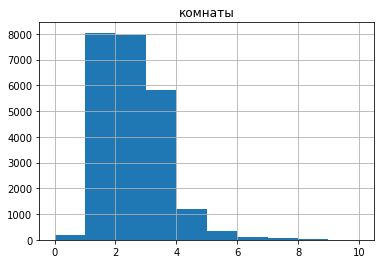

In [26]:
df['rooms'].hist(bins=10, range=(0,10)) # построим гистограмму данных о числе комнат
df['rooms'].describe() # выведем числоое описание данных
plt.title('комнаты')
plt.show()

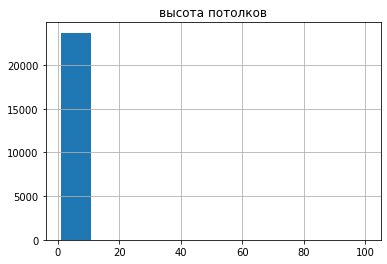

In [27]:
df['ceiling_height'].hist() # построим гистограмму данных о высоте потолков
df['ceiling_height'].describe() # выведем числоое описание данных
plt.title('высота потолков')
plt.show()

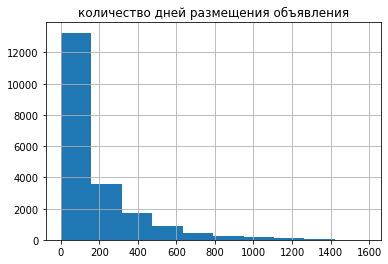

In [28]:
df['days_exposition'].hist() # построим гистограмму данных сколько дней было размещено объявление о продаже квартиры
df['days_exposition'].describe() # выведем числоое описание данных
plt.title('количество дней размещения объявления')
plt.show()

In [29]:
df['days_exposition'].mean() #найдем среднее арифметическое значение о кол-ве дней размещения объявления

180.88863436982163

In [30]:
df['days_exposition'].median() #найдем медиану кол-ва дней размещения объявления

95.0

**Вывод**

в данных столбца days_exposition присутствуют пропущенные значения Nan - вероятно это объявления, которые еще не были сняты с публикации

In [31]:
def total_area_group(total_area): #создаем функцию для определения категорий площади квартир
    if total_area < 40:
        return 'Площадь менее 40 кв.м.'
    elif total_area <= 55:
        return 'Площадь 40-55 кв.м.'
    elif total_area <= 75:
        return 'Площадь 56-75 кв.м.'
    elif total_area <= 100:
        return 'Площадь 76-100 кв.м.'
    else:
        return 'Площадь более 100 кв.м.'
df['total_area_group'] = df['total_area'].apply(total_area_group)
pivot_table_total_area_group = df.pivot_table(index='total_area_group', values='price_per_square_meter',aggfunc='median') # объединяем данные из двух таблиц
display('Медианная стоимость квадратного метра',pivot_table_total_area_group)# выводим зависимость цены от дня недели размещения объявления

'Медианная стоимость квадратного метра'

,price_per_square_meter
total_area_group,
Площадь 40-55 кв.м.,90890.710
Площадь 56-75 кв.м.,89142.860
Площадь 76-100 кв.м.,98936.170
Площадь более 100 кв.м.,118942.415
Площадь менее 40 кв.м.,99358.970


**Вывод**

Кваритры в площадью более 100 кв.м. имеют самую дорогую стоимость квадратного метра, а также квартиры с площадью менее 40 кв.м.

In [32]:
display(df['total_area'].corr(df['price_per_square_meter']))

0.30196021032713416

**Вывод**

Величина 0.30 говорит о наличии связи, но малой- от увеличения площади квартиры растет цена за квадратный метр.

In [33]:
pivot_table_rooms = df.pivot_table(index='rooms', values='price_per_square_meter',aggfunc='median').round(2)# объединяем данные из двух таблиц
display('Медианная стоимость квадратного метра по колличествам комнат',pivot_table_rooms) # выводим зависимость цены от кол-ва комнат

'Медианная стоимость квадратного метра по колличествам комнат'

,price_per_square_meter
rooms,
0,105555.56
1,100000.00
2,92796.56
3,88983.05
4,92666.67
5,96517.06
6,99411.76
7,108827.09
8,106760.19


**Вывод**
самая низкая стоимость квадратного метра квартиры с 10 комнатами, самая высокая- с 12 комнатами.


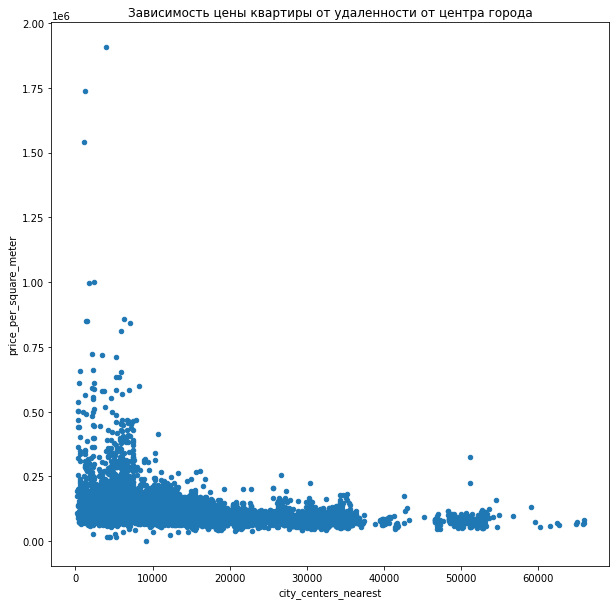

In [34]:
df.plot(x='city_centers_nearest',y='price_per_square_meter',kind='scatter',figsize=(10,10)) #посмотрим на цену и удаленность квартиры от центра
plt.title('Зависимость цены квартиры от удаленности от центра города')
plt.show()

**Вывод**

Стоимость за квадратный метр все же зависит от расстояния от ценра города


In [35]:
pivot_table_day_weekday = df.pivot_table(index='first_day_weekday', values='last_price',aggfunc='median') # объединяем данные из двух таблиц
display('Медианная стоимость квартиры от даты размещения объявления',pivot_table_day_weekday) # выводим зависимость цены от дня недели размещения объявления

'Медианная стоимость квартиры от даты размещения объявления'

,last_price
first_day_weekday,
0,4650000.0
1,4730000.0
2,4700000.0
3,4650000.0
4,4585000.0
5,4555000.0
6,4550000.0


**Вывод**

В субботу и в воскресенье самая низкая стоимость квартиры


In [36]:
pivot_table_day_month = df.pivot_table(index='first_day_month', values='last_price',aggfunc='median') # объединяем данные из двух таблиц
display('Медианная стоимость квартиры от месяца размещения объявления',pivot_table_day_month) # выводим зависимость цены от месяца размещения объявления

'Медианная стоимость квартиры от месяца размещения объявления'

,last_price
first_day_month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4515000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


**Вывод**

САмая низкая стоимость кварир была в июне, самая высокая в апреле.



In [37]:
pivot_table_day_year = df.pivot_table(index='first_day_year', values='last_price',aggfunc='median') # объединяем данные из двух таблиц
display('Медианная стоимость квартиры по году размещения объявления',pivot_table_day_year) # выводим зависимость цены от года размещения объявления

'Медианная стоимость квартиры по году размещения объявления'

,last_price
first_day_year,
2014,7700000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


**Вывод**

Самая высокая цена была в 2014 году, самая низкая в 2017 году

In [38]:
pivot_table_floor = df.pivot_table(index='floor_category', values='last_price',aggfunc='median') # объединяем данные из двух таблиц
display('Медианная стоимость по этажностям квартиры',pivot_table_floor) # выводим зависимость цены от того, на каком этаже расположена квартира

'Медианная стоимость по этажностям квартиры'

,last_price
floor_category,
другой,4850000.0
первый,3900000.0
последний,4300000.0


**Вывод**

Квартиры, находящиеся на первом и последних этажах имеют более низкую стоимость

In [39]:
top_locality=df['locality_name'].value_counts().sort_values(ascending=False).head(10) # выделяем 10 населённых пунктов с наибольшим числом объявлений.
display(top_locality)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [40]:
average_price_top_locality=df[df['locality_name'].isin(top_locality.index)]
average_price_top_locality.pivot_table(index='locality_name', values='price_per_square_meter',aggfunc='mean').round(2) #вывели среднюю цену квадратного метра в 10-ти населённых пунктах


,price_per_square_meter
locality_name,
Всеволожск,68654.47
Выборг,58141.91
Гатчина,68746.15
Колпино,75424.58
Пушкин,103125.82
Санкт-Петербург,114849.01
деревня Кудрово,92473.55
поселок Мурино,85681.76
поселок Парголово,90175.91


In [41]:
price_max = df[df['price_per_square_meter'] == df['price_per_square_meter'].max()] #Определяем населенный пункт с самой высокой центой ха квадратный метр
display(price_max)     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,first_day_weekday,first_day_month,first_day_year,floor_category,living_total_area,kitchen_total_area,total_area_group
12971,19,763000000.0,400.0,1506729600000000000,7,3,10.0,250.0,10,0,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1907500.0,5,9,2017,последний,0.62,NaN,Площадь более 100 кв.м.


In [42]:
price_min = df[df['price_per_square_meter'] == df['price_per_square_meter'].min()] #Определяем населенный пункт с самой низкой центой за квадратный метр
display(price_min)     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,first_day_weekday,first_day_month,first_day_year,floor_category,living_total_area,kitchen_total_area,total_area_group
8793,7,12190.0,109.0,1553040000000000000,2,3,25.0,32.0,25,0,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,111.83,2,3,2019,последний,0.29,0.37,Площадь более 100 кв.м.


**Вывод**

Выделили 10 населенных пунктов с наибольшим количеством объявлений.Посчитала среднюю цену квадратного метра в этих населённых пунктах.
Определила населенный пункт с самой высокой стоимостью жилья - Санкт-Петербург(last_price-12190.0;price_per_square_meter-111.83 )
Определила населенный пункт с самой низкой стоимостью жилья - Санкт-Петербург(last_price-763000000.0;price_per_square_meter-1907500.0)

In [43]:
df_spb = df.query('locality_name == "Санкт-Петербург"') #Выделила квартиры в Санкт-Петербурге
pd.set_option('mode.chained_assignment',None)
df_spb['city_centers_km'] = (df_spb['city_centers_nearest']/1000).round() #добавляем столбец с расстоянием до центра в километрах, предварительно округлив
centers_km =df_spb.groupby('city_centers_km')['last_price'].median().sort_values() #находим среднюю цену для каждого километра
display(centers_km)

city_centers_km
26.0     3320000.0
24.0     3480000.0
25.0     3794881.0
18.0     4300000.0
23.0     4500000.0
19.0     4500000.0
29.0     4535000.0
17.0     4580000.0
16.0     4750000.0
14.0     4870000.0
15.0     4900000.0
22.0     4925000.0
12.0     4950000.0
28.0     4990000.0
10.0     5000000.0
11.0     5072500.0
13.0     5200000.0
21.0     5289476.0
9.0      5300000.0
20.0     5550000.0
8.0      7450000.0
7.0      7800000.0
27.0     8300000.0
3.0      8409000.0
6.0      8900000.0
4.0      9200000.0
5.0      9500000.0
2.0     10000000.0
1.0     11395000.0
0.0     17900000.0
Name: last_price, dtype: float64

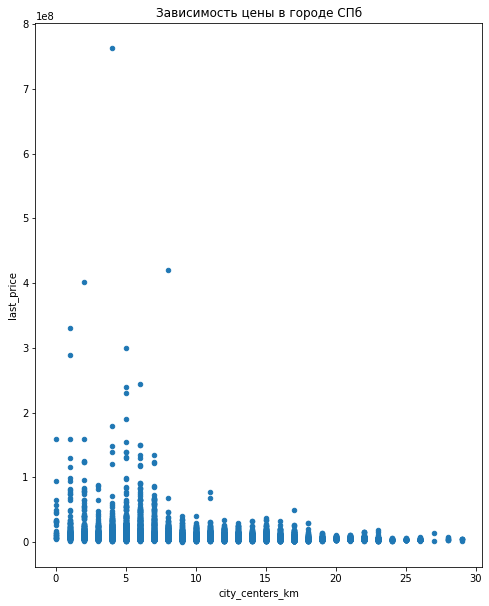

<AxesSubplot:xlabel='city_centers_km'>

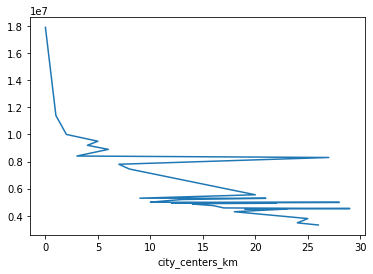

In [44]:
df_spb.plot(x='city_centers_km',y='last_price',kind='scatter',figsize=(8,10)) # посторим график
plt.title('Зависимость цены в городе СПб')
plt.show()

centers_km.plot()


**Вывод**

По графикам можно выделить высокие цены приблизительно до 8км., тоесть до 8 км будем считать центром города.Цена квартир зависит от расстояния до центра.

In [45]:
df_spb_center = df_spb.query('city_centers_km < 8') # выделяем сегмент квартир в центре
pivot_table_df_spb_center_total_area = df_spb_center.pivot_table(index='total_area', values='last_price',aggfunc='median') # проверим влияет ли стоимость квартир от общей площади
display(pivot_table_df_spb_center_total_area)
print(df_spb_center['total_area'].corr(df_spb_center['last_price']))

,last_price
total_area,
12.0,2400000.0
13.0,2825000.0
13.2,1686000.0
15.5,2450000.0
16.0,2100000.0
...,...
517.0,50000000.0
590.0,65000000.0
618.0,300000000.0


0.6134795930558571


**Вывод**

Корреляция в 0.61 говорит, что стоимость квартир выше к ценру города

In [46]:
pivot_table_df_spb_center_rooms= df_spb_center.pivot_table(index='rooms', values='last_price',aggfunc='median') #проверим зависит ли стоимость квартир от кол-ва комнат
display(pivot_table_df_spb_center_rooms)
print(df_spb_center['rooms'].corr(df_spb_center['last_price']))

,last_price
rooms,
0,5050000.0
1,6000000.0
2,7703451.0
3,10000000.0
4,12200000.0
5,14900000.0
6,19500000.0
7,24900000.0
8,21045000.0


0.3148736324503909


**Вывод**

Корреляция в 0.31 говорит о незначительной связи стоимости квартиры и количества комнат

In [47]:
pivot_table_df_spb_center_ceiling_height= df_spb_center.pivot_table(index='ceiling_height', values='last_price',aggfunc='median') #проверим зависит ли стоимость квартир от кол-ва комнат
display(pivot_table_df_spb_center_ceiling_height)
print(df_spb_center['ceiling_height'].corr(df_spb_center['last_price']))

,last_price
ceiling_height,
2,5900000.0
3,9000000.0
4,12990000.0
5,91500000.0
6,48900000.0


0.1309359233861244


**Вывод**

Корреляция в 0.13 говорит об отсутствии связи между стоимостью квартир и высоты потолков

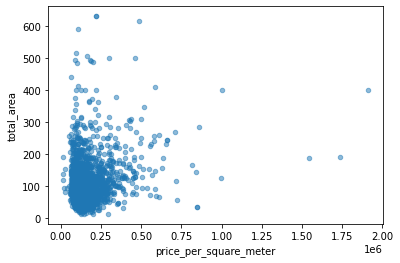

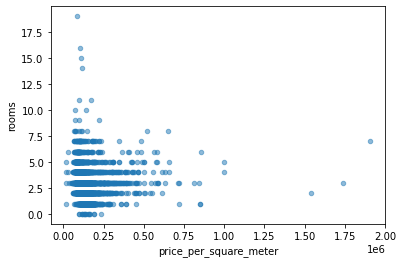

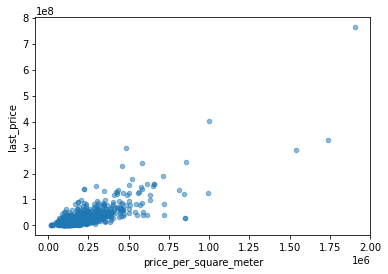

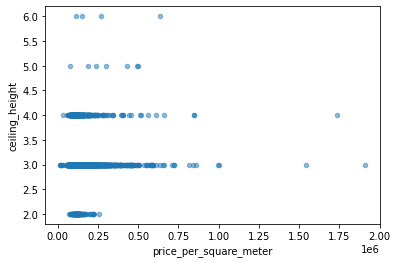

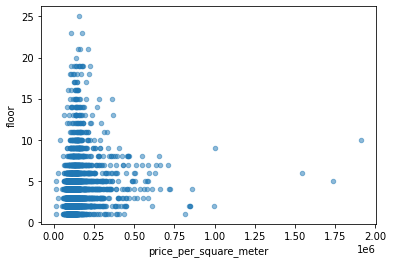

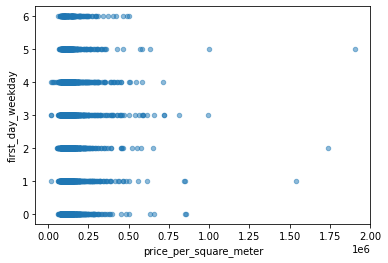

In [48]:
for column in ['total_area','rooms','last_price','ceiling_height','floor','first_day_weekday']:
    df_spb_center.plot(
    kind='scatter',
    x='price_per_square_meter',
    y=column,
    alpha=0.5)
    plt.show()

**Вывод**


Явные зависимости увеличения цены от числа комнат, высоты потолков, этажа, дата размещения объявления отсутствуют.


## Общий вывод

Проанализировав предоставленные данные можно выделить как основной параметр зависимости величины цены  - расстояние. Как в центре самого города, так и разброс от центра по области.
Также кваритры с площадью более 100 кв.м. имеют самую дорогую стоимость квадратного метра, а также квартиры с площадью менее 40 кв.м.
